# ML -  ASSIGNMENT 1 SHIV PRATAP SINGH 200968038 

In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('mtcars.csv')

In [118]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## 1.Write a user defined function ‘myFnLinReg(x,y)’to perform Simple Linear Regression given one predictor attribute and one response attribute. The function should return the coefficients of the straight line.

In [4]:
X=np.array(df['wt'].values,'float')
y=np.array(df['mpg'].values,'float')

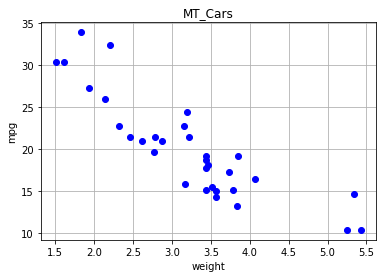

In [5]:
import matplotlib.pyplot as plt
plt.plot(X,y,'bo')
plt.ylabel('mpg')
plt.xlabel('weight')
plt.title('MT_Cars')
plt.grid()
plt.show()
#Relationship seems linear

In [6]:
def myFnLinReg(x,y):
    x_0 = x.mean()
    y_0=y.mean()
    a = (((x_0-x)*(y_0-y)).sum())/((x_0-x)**2).sum()
    b = y_0-a*x_0
    print(f'y = {a}x + {b}')
    return a,b

In [7]:
a,b = myFnLinReg(df['wt'],df['mpg'])
print(f'X-Coefficient = {round(a,5)}')
print(f'Constant = {round(b,5)}')

y = -5.344471572722676x + 37.28512616734202
X-Coefficient = -5.34447
Constant = 37.28513


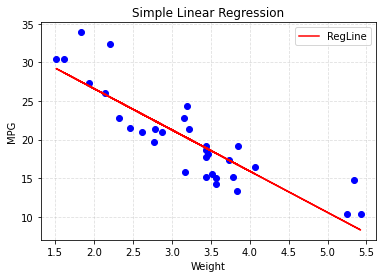

In [8]:
#PLotting scatter plot and our regression line with computed weights over entire dataset
x=np.array(df['wt'])
y=np.array(df['mpg'].values,'float')
plt.plot(x,y,'bo')
plt.plot(x,a*x+b,'r',label='RegLine')
plt.title('Simple Linear Regression')
plt.grid(alpha=.4,linestyle='--')

plt.legend()

plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

## 2.Use mtcars data set and consider the attributes mpg and weight. Split data into train and test sets (80 %,20%). Put training data set to ‘myFnLinReg(x,y)’ to build a linear regression model to predict mpg given the weight of the car.

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.2,random_state=42)

In [55]:
x_train.shape

(25,)

In [10]:
y_test.shape

(7,)

In [11]:
a_train,b_train = myFnLinReg(x_train,y_train)

y = -5.336941400557081x + 36.93731031351841


## 3.What is the mpg of a car, whose weight is 5.5?

In [12]:
print(f'The mpg of a car whose weight is 5.5 = {round(a_train*5.5+b_train,5)} miles per gallon (rounded off by 5 digits)')

The mpg of a car whose weight is 5.5 = 7.58413 miles per gallon (rounded off by 5 digits)


## 4.Compute and print accuracy measures such as RMSE and R2 for the test set. 

In [13]:
def test_metrics(x_test,y_test,a_train,b_train):
    y_pred = (a_train*x_test+b_train)
    error = (y_test-y_pred)
    y_mean = np.mean(y_test)
    rsme = np.sqrt((error**2).sum()/y_test.shape[0])
    r2 = 1-(error**2).sum()/((y_test-y_mean)**2).sum()
    return rsme,r2

In [14]:
rsme,r2 = test_metrics(x_test,y_test,a_train,b_train)
print(f'RSME = {rsme} and R2 = {r2}')

RSME = 3.5321361326991405 and R2 = 0.6879761857596272


## 5.Apply the stochastic gradient descent and mini batch gradient descent algorithms to enhance the accuracy and visualize the cost function.

In [15]:
X=np.array(df['wt'].values,'float')
y=np.array(df['mpg'].values,'float')

In [16]:
X=X.reshape(X.shape[0],1)
X = np.hstack([np.ones_like(X),X])
y=y.reshape(y.shape[0],1)
m = y.shape[0]
#hstack numpy function adds a column of 1s this is to get the constant b of linear regression equation-->y=ax+b

In [17]:
X

array([[1.   , 2.62 ],
       [1.   , 2.875],
       [1.   , 2.32 ],
       [1.   , 3.215],
       [1.   , 3.44 ],
       [1.   , 3.46 ],
       [1.   , 3.57 ],
       [1.   , 3.19 ],
       [1.   , 3.15 ],
       [1.   , 3.44 ],
       [1.   , 3.44 ],
       [1.   , 4.07 ],
       [1.   , 3.73 ],
       [1.   , 3.78 ],
       [1.   , 5.25 ],
       [1.   , 5.424],
       [1.   , 5.345],
       [1.   , 2.2  ],
       [1.   , 1.615],
       [1.   , 1.835],
       [1.   , 2.465],
       [1.   , 3.52 ],
       [1.   , 3.435],
       [1.   , 3.84 ],
       [1.   , 3.845],
       [1.   , 1.935],
       [1.   , 2.14 ],
       [1.   , 1.513],
       [1.   , 3.17 ],
       [1.   , 2.77 ],
       [1.   , 3.57 ],
       [1.   , 2.78 ]])

In [18]:
theta = np.zeros((2,1))
theta

array([[0.],
       [0.]])

# Stochastic Gradient

In [28]:
import random
def stoch_gd(x,y,epochs, learning_rate = 0.001):
    total_samples = x.shape[0]
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = x[random_index]
        sample_y = y[random_index]

        y_predicted = theta[0][0]*sample_x + theta[1][0]
        theta0_grad = -(2/total_samples)*(sample_x*(sample_y-y_predicted))
        theta1_grad = -(2/total_samples)*(sample_y-y_predicted)
        theta[0][0] = theta[0][0] - learning_rate * theta0_grad
        theta[1][0] = theta[1][0] - learning_rate * theta1_grad
        
        cost = (sample_y-y_predicted)**2
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return theta, cost, cost_list, epoch_list

theta, cost_sgd, cost_list_sgd, epoch_list_sgd = stoch_gd(x_train,y_train,20000)
theta, cost_sgd

(array([[-4.68057042],
        [34.64801632]]),
 11.416844348847551)

In [29]:
rsme,r2 = test_metrics(x_test,y_test,theta[0][0],theta[1][0])
print(f'RSME = {rsme} and R2 = {r2}')

RSME = 3.66377232239368 and R2 = 0.6642857086562197


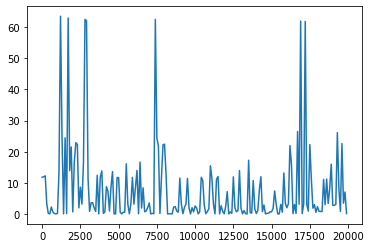

In [110]:
# fig,ax = plt.sub
plt.plot(epoch_list_sgd,cost_list_sgd)

plt.show()

In [ ]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

# Mini Batch Gradient Descent

In [104]:
# linear regression using "mini-batch" gradient descent

# function to compute gradient of error function w.r.t. theta
def gradient(X, y, theta):
    h = np.dot(X, theta) #Hypothesis
    grad = np.dot(X.T, (h - y))
    return grad

def cost(X, y, theta):
    h = np.dot(X, theta)
    J = (1/2)*np.dot((h - y).transpose(), (h - y))
    return J[0]
  
# function to create a list containing mini-batches
def create_mini_batches(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0
  
    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

# function to perform mini-batch gradient descent
def gradientDescent_Mini(X, y, learning_rate = 0.001, batch_size = 8):
    cost_list=[]
    theta = np.zeros((2, 1))
    epoch_list=[]
    max_iters = 10
    for itr in range(max_iters):
        mini_batches = create_mini_batches(X, y, batch_size)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta)
            cost_list.append(cost(X_mini, y_mini, theta))
  
    return theta, cost_list

In [71]:
x_train = x_train.reshape(25,1)
x_train = np.hstack([np.ones_like(x_train),x_train])
theta = np.zeros((2, 1))
y_train = y_train.reshape(25,1)

In [105]:
theta, cost_list_mb = gradientDescent_Mini(x_train,y_train)

In [112]:
theta

array([[2.14641353],
       [4.64444604]])

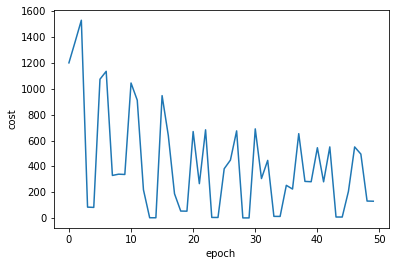

In [106]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(cost_list_mb)

In [111]:
rsme,r2 = test_metrics(x_test,y_test,a_train,b_train)
print(f'RSME = {rsme} and R2 = {r2}')

RSME = 3.5321361326991405 and R2 = 0.6879761857596272


# Exercise 2

### 1.Use the boston.csv dataset and determine the best 5 features to predict ‘MEDV'

In [150]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [141]:
df_2 = pd.read_csv('Boston.csv')#Reading data

In [142]:
df_2

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [143]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [144]:
df_2.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

### Data Cleaning

In [145]:
X = df_2.drop(columns='medv')
y = df_2['medv']

<AxesSubplot:>

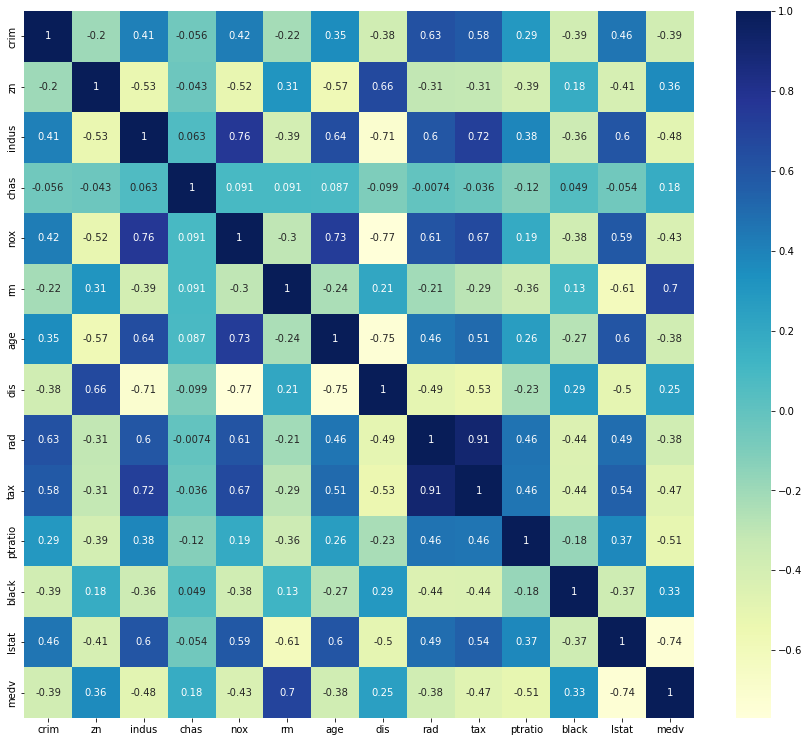

In [148]:
import seaborn as sns
df_corr = df_2.corr()
fig , ax = plt.subplots(figsize=(15,13))
sns.heatmap(data = df_corr,annot = True,cmap="YlGnBu")

In [149]:
## 'rad' & 'tax' have a high correlation with one another
## eliminate 'tax' not rad since it has better correlation than 'tax' with target
# (Eliminate features with correlation > 0.90 or < -.90)
X.drop(columns='tax',inplace=True)

In [153]:
from sklearn.model_selection import train_test_split 

## perform a train-test split of 80%/20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [154]:
## This is regression problem with continuous input and target use select f_regression for 5 features
getFeatures = SelectKBest(score_func=f_regression, k=5)

## fit the training data to this object of SelectKBest
X_new = getFeatures.fit_transform(X_train,y_train)

## X_new right now is a 2D numpy array, we need to get a data frame instead
## To do that, obtain the data feature list 
feature_list = X_train.columns[getFeatures.get_support()]

In [155]:
feature_list

Index(['indus', 'nox', 'rm', 'ptratio', 'lstat'], dtype='object')

### 2.Using sklearn.linear_model, find the multiple regression model for the boston.csv dataset using the best 3features.  (from sklearn.linear_model import LinearRegression) 

In [156]:
## now for 3 features
getFeatures_best3 = SelectKBest(score_func=f_regression, k=3)
X_new_best3 = getFeatures_best3.fit_transform(X_train,y_train)

## X_new right now is a 2D numpy array, we need to get a data frame instead
## To do that, obtain the data feature list 
feature_list = X_train.columns[getFeatures_best3.get_support()]
#getsupport() - returns boolean array, true where feature is selcted otherwise false
## now select the new features
X_train_new_best3 = X_train.loc[:,getFeatures_best3.get_support()]
X_train_new_best3.head()

[False False  True False False  True False False False False False  True]


,indus,rm,lstat
246,5.86,6.108,9.16
296,13.92,6.549,7.39
168,19.58,6.319,11.10
357,18.10,6.395,13.27
63,5.13,6.762,9.50


In [157]:
## do it similarly for test features
X_test_new_best3 = X_test.loc[:,getFeatures_best3.get_support()]
X_test_new_best3.head()

,indus,rm,lstat
48,6.91,5.399,30.81
64,1.38,7.104,8.05
473,18.10,6.980,11.66
485,18.10,6.312,10.58
228,6.20,7.686,3.92


In [159]:
from sklearn.linear_model import LinearRegression
model_3_best = LinearRegression()
model_3_best.fit(X_train_new_best3,y_train)#Train with best 3 features

LinearRegression()

### 3.Find the accuracy of the model using appropriate metrics using 80, 20 split for training and test.

In [160]:
model_3_best.score(X_test_new_best3,y_test)

0.6490244600124021

# THE END